# Module 11: Object Oriented Programming Returns!

## Topic 1: More Classes

### This topic continues going through details of classes including using multiple classes in a program

## Topic 2: Inheritance

### Inheritance of a class is taking on attributes of that class

### This is often thought of as a parent-child, super-sub, or base-derived class relationship 

### Examples of parent-child include:
### &emsp; Person - Student
### &emsp; Vehicle - Truck
### &emsp;   School - CommunityCollege

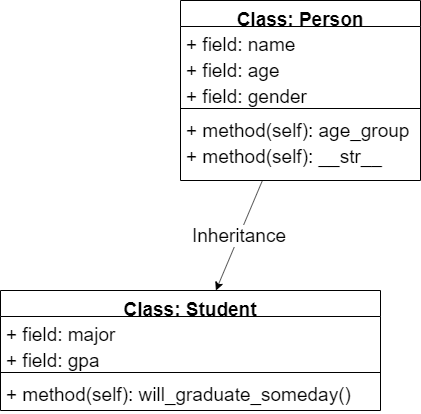

In [2]:
class Person:
    limbs = 4
    def __init__(self,name,age,gender):
        self.name = name
        self.age = age
        self.gender = gender
    
    def age_group(self):
        if self.age < 18:
            return "minor"
        elif self.age < 40:
            return "adult"
        else:
            return "over the hill"
        
    def __str__(self):
        return f'{self.name} is the name of the person\n{self.age} is the age\n{self.gender} is the gender\n'

In [3]:
my_person_1=Person("Matt Gilbertson",39,"Male")
print(my_person_1)
print(my_person_1.age_group())

Matt Gilbertson is the name of the person
39 is the age
Male is the gender

adult


### Now let's make a derived class of Student from the Person class

In [4]:
class Student(Person):
    def __init__(self,name,age,gender,major,gpa):
        # This makes the derived class use attributes from the parent class
        super().__init__(name,age,gender)
        self.major = major
        self.gpa = gpa
    
    def will_graduate_someday(self):
        if self.gpa < 1.0:
            return self.name + " - Never gonna happen"
        elif self.gpa <2.2:
            return self.name + " - Decent chance"
        else:
            return self.name + " is heading for diploma town"
        
    def __str__(self):
        return f'{self.name}, age:{self.age}, gender:{self.gender}\n{self.major} - GPA:{self.gpa}'        

### I can now instantiate a new Student object

In [5]:
my_student_1 = Student("joe",22,"Male","CIS",4.0)

### I can use methods created in my derived class

In [6]:
print(my_student_1.will_graduate_someday())

joe is heading for diploma town


### I can access attributes that were defined in my base class for objects made from my derived class

In [7]:
print(my_student_1.age)

22


### I can also utilize methods created in my base class for objects in my derived class

In [8]:
print(my_student_1.age_group())

adult


### If an \_\_str\_\_ function hadn't been defined in the derived class, the one from the base class would have been used

In [9]:
print(my_student_1)

joe, age:22, gender:Male
CIS - GPA:4.0


### This is called method overriding or...polymorphism (which is topic 4)

## Topic 3: Testing Base and Derived Classes

In [ ]:
import unittest

class PersonTestCase(unittest.TestCase):
    def setUp(self):
        self.person1 = Person("fake",99,"Female")
    def tearDown(self):
        del self.person1
    
    def test_object_attributes(self):
        self.assertEqual(self.person1.name,"fake")
        self.assertEqual(self.person1.age,99)
        self.assertEqual(self.person1.gender,"Female")
    
    def test_age_group_function(self):
        self.person2 = Person("fake2",12,"Male")
        self.assertEqual(self.person1.age_group(),"over the hill")
        self.assertEqual(self.person2.age_group(),"minor")
    
    def test_str_output(self):
        self.assertEqual(str(self.person1),'fake is the name of the person\n99 is the age\nFemale is the gender\n')
        
class StudentTestCase(unittest.TestCase):
    def setUp(self):
        self.student1 = Student("fakey",44,"Male","CIS",3.3)
    def tearDown(self):
        del self.student1
        
    def test_object_attributes(self):
        self.assertEqual(self.student1.name,"fakey")
        self.assertEqual(self.student1.age,44)
        self.assertEqual(self.student1.gender,"Male")
        self.assertEqual(self.student1.major,"CIS")
        self.assertEqual(self.student1.gpa,3.3)
        
    def test_age_group_function(self):
        self.student2 = Student("fake4",12,"Male","BIS",3.5)
        self.assertEqual(self.student1.age_group(),"over the hill")
        self.assertEqual(self.student2.age_group(),"minor")
    
    def test_str_output(self):
        self.assertEqual(str(self.student1),'fakey, age:44, gender:Male\nCIS - GPA:3.3')
    

unittest.main(argv=[''],exit=False)

## Topic 4: Polymorphism

### Polymorphism is the ability to override the inheritance from a base class in the derived class

### For instance, using our classes from before

In [10]:
class Person:
    def __init__(self,name,age,gender):
        self.name = name
        self.age = age
        self.gender = gender
    
    def age_group(self):
        if self.age < 18:
            return "minor"
        elif self.age < 40:
            return "adult"
        else:
            return "over the hill"
        
    def __str__(self):
        return f'{self.name} is the name of the person\n{self.age} is the age\n{self.gender} is the gender\n'

### Now, if I want the age_group method to mean something else when I create objects from the Student class, I can just define the method again in the child class

In [11]:
class Student(Person):
    def __init__(self,name,age,gender,major,gpa):
        # This makes the derived class use attributes from the parent class
        super().__init__(name,age,gender)
        self.major = major
        self.gpa = gpa
        
    def age_group(self):
        if self.age < 18:
            return "early entry student"
        elif self.age < 23:
            return "traditional student"
        else:
            return "non-traditional student"
    
    def will_graduate_someday(self):
        if self.gpa < 1.0:
            return self.name + " - Never gonna happen"
        elif self.gpa <2.2:
            return self.name + " - Decent chance"
        else:
            return self.name + " is heading for diploma town"
    def __str__(self):
        return f'{self.name}, age:{self.age}, gender:{self.gender}\n{self.major} - GPA:{self.gpa}'        

In [12]:
student_1 = Student("Matt",39,"Male","CIS",3.99)

In [13]:
student_1.age_group()

'non-traditional student'

## Topic 5: Multiple Inheritance

### Multiple inheritance is when a derived class has two base classes

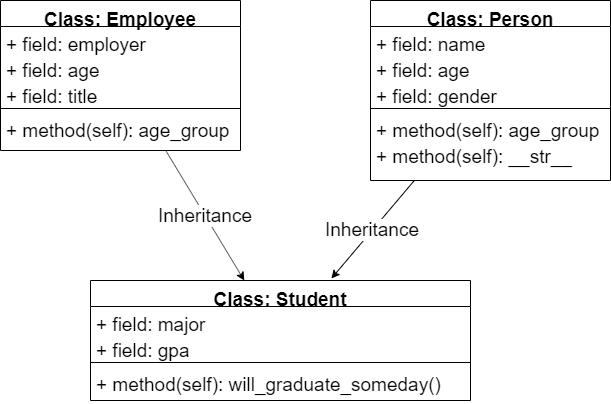

In [14]:
class Employee:
    def __init__(self, employer, age, title):
        self.employer = employer
        self.age = age
        self.title = title
    
    def age_group(self):
        if self.age < 21:
            return "early years"
        elif self.age < 45:
            return "middle years"
        elif self.age <65:
            return "senior employee level"
        else:
            return "retirement age"

In [18]:
class Student(Employee, Person):
    def __init__(self,name,age,gender,major,gpa,employer,title):
        # This makes the derived class use attributes from the parent class
        Person.__init__(self,name, age, gender)
        Employee.__init__(self,employer, age, title)
        self.major = major
        self.gpa = gpa
        

In [19]:
student_4 = Student("Sam",44,"Female","Marketing",3.1,"Walmart","Greeter")

### I'm going to now access the age_group method which is defined in both of my base classes...

In [20]:
print(student_4.age_group())

middle years


### This is an example of Method Resolution Order (MRO)

### You can see the resolution order for a class by using the built in .mro() method on the class

In [23]:
print(Student.mro())
print(Student.__mro__)

[<class '__main__.Student'>, <class '__main__.Employee'>, <class '__main__.Person'>, <class 'object'>]
(<class '__main__.Student'>, <class '__main__.Employee'>, <class '__main__.Person'>, <class 'object'>)
